In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from ast import literal_eval

import requests
from bs4 import BeautifulSoup

import glob


%matplotlib inline
plt.rcParams['axes.formatter.useoffset'] = False
sns.set_context('notebook')
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500) # show more columns
NAN = np.nan # store numpy.nan

In [2]:
from load_tichu_games import load_games

In [3]:
data = load_games()

Loading data...


In [4]:
data['successful_tichu'] = data.apply(lambda row: row.tichu_call and row.out_first, axis=1)

In [5]:
data.head()

,Dr,Ph,A,K,Q,J,T,9,8,7,6,5,4,3,2,Mahj,Dog,player_name,gt_call,tichu_call,out_first,player_elo,successful_tichu
0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,*Coach*,0,0,1,1546.0,0
1,1.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,geotheo,1,0,0,1611.0,0
2,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,Tichulo8refths,0,0,0,1761.0,0
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,katerinoula+g,0,0,0,1644.0,0
4,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,*Coach*,0,0,0,1546.0,0


In [6]:
data[data['successful_tichu'] == 1]

,Dr,Ph,A,K,Q,J,T,9,8,7,6,5,4,3,2,Mahj,Dog,player_name,gt_call,tichu_call,out_first,player_elo,successful_tichu
7,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,katerinoula+g,0,1,1,1644.0,1
41,0.0,1.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,20bek88,0,1,1,1570.0,1
54,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,Re@per^,0,1,1,1786.0,1
62,0.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,0.0,Puddingschecke,0,1,1,1511.0,1
66,0.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,Puddingschecke,0,1,1,1511.0,1
72,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,sappie,0,1,1,1582.0,1
77,0.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,asfinag,0,1,1,1507.0,1
80,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,sappie,0,1,1,1582.0,1
99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,Tom_Dwan,0,1,1,1765.0,1
102,0.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,darkbloodrave,0,1,1,1620.0,1


In [7]:
# sklearn
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import preprocessing as pp
from sklearn.model_selection import KFold , cross_val_score, train_test_split, validation_curve
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import learning_curve

In [12]:
rf_input_data = data[['A', 'K', 'Q', 'J', 'T', 
                      '9', '8', '7', '6', '5', '4', '3', '2', 
                      'Dr', 'Ph', 'Mahj', 'Dog']]
len(rf_input_data)

18664

In [9]:
rf = RandomForestClassifier()
cross_val_score(rf, rf_input_data, data['successful_tichu'], cv=3, n_jobs=3, pre_dispatch='n_jobs+1', verbose=1)

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.2s finished


array([ 0.89537126,  0.89680116,  0.8969619 ])

In [10]:
def show_important_features_random_forest(X, y, rf=None):
    if rf is None:
        rf = RandomForestClassifier()

    # train the forest
    rf.fit(X, y)

    # find the feature importances
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    
    # plot the feature importances
    cols = X.columns
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %s (%f)" % (f + 1, cols[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), cols[indices])
    plt.xlim([-1, X.shape[1]])
    plt.show()  


Feature ranking:
1. feature 3 (0.070522)
2. feature A (0.070137)
3. feature K (0.069089)
4. feature Q (0.068425)
5. feature Dr (0.068034)
6. feature 2 (0.067591)
7. feature 4 (0.064680)
8. feature Ph (0.064296)
9. feature 5 (0.062721)
10. feature 9 (0.061229)
11. feature 7 (0.059949)
12. feature J (0.058178)
13. feature 6 (0.056647)
14. feature 8 (0.053727)
15. feature T (0.049349)
16. feature Mahj (0.028642)
17. feature Dog (0.026784)


/home/lu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


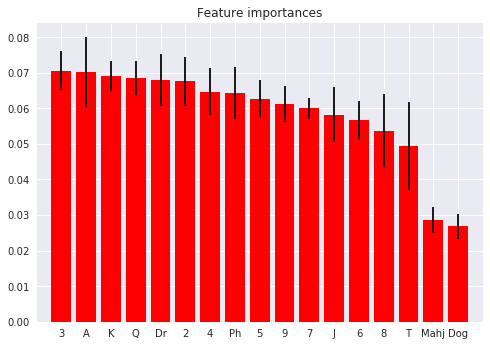

In [11]:
show_important_features_random_forest(rf_input_data, data['tichu_call'])